### This notebook will mainly be used for the Data Science Coursera Capstone project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
#Load the dataset
file_name = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(file_name)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#Take a look at the attributes of interest

In [6]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [7]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [8]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [9]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [11]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [12]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [13]:
#Drop the variables not in use
df.drop(['INCKEY', 'COLDETKEY', 'LOCATION', 'EXCEPTRSNCODE',
        'EXCEPTRSNDESC', 'SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT',
        'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC',
        'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
        'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'X', 'Y',
        'REPORTNO', 'STATUS', 'SEVERITYCODE.1', 'INCDTTM', 'INATTENTIONIND',
        'INTKEY', 'ADDRTYPE'],
       axis = 1, inplace = True)

In [14]:
df.head()

,SEVERITYCODE,OBJECTID,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,1,Angles,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,1,2,Sideswipe,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
2,1,3,Parked Car,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
3,1,4,Other,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
4,2,5,Angles,At Intersection (intersection related),0,Raining,Wet,Daylight


In [15]:
#Are there missing values?
df.count()

SEVERITYCODE     194673
OBJECTID         194673
COLLISIONTYPE    189769
JUNCTIONTYPE     188344
UNDERINFL        189789
WEATHER          189592
ROADCOND         189661
LIGHTCOND        189503
dtype: int64

In [16]:
#Set index
df.set_index('OBJECTID', inplace = True)

In [17]:
#Take care of the inconsistency of notation in UNDERINFL
df['UNDERINFL'].replace('0','N', inplace = True)
df['UNDERINFL'].replace('1','Y', inplace = True)

In [18]:
#Check that it worked
df.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,,,,,
1,2,Angles,At Intersection (intersection related),N,Overcast,Wet,Daylight
2,1,Sideswipe,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On
3,1,Parked Car,Mid-Block (not related to intersection),N,Overcast,Dry,Daylight
4,1,Other,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
5,2,Angles,At Intersection (intersection related),N,Raining,Wet,Daylight


In [19]:
#Find the missing values in all attributes
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64



In [20]:
#Drop the missing values
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["UNDERINFL"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)

In [21]:
#Confirm
df.count()

SEVERITYCODE     183177
COLLISIONTYPE    183177
JUNCTIONTYPE     183177
UNDERINFL        183177
WEATHER          183177
ROADCOND         183177
LIGHTCOND        183177
dtype: int64

In [22]:
#Reset index
df.reset_index(drop=True, inplace=True)

In [23]:
#The observations in the categories "unknown" will mess with the analysis. Drop it. We are still left with a substantial dataset.
df = df[df.JUNCTIONTYPE != 'Unknown']
df = df[df.WEATHER != 'Unknown']
df = df[df.ROADCOND != 'Unknown']
df = df[df.LIGHTCOND != 'Unknown']

In [24]:
df.count()

SEVERITYCODE     167980
COLLISIONTYPE    167980
JUNCTIONTYPE     167980
UNDERINFL        167980
WEATHER          167980
ROADCOND         167980
LIGHTCOND        167980
dtype: int64

In [25]:
#Confirm that all the attributes are ready to work.

In [26]:
df['COLLISIONTYPE'].value_counts()

Angles        33742
Parked Car    32589
Rear Ended    32489
Other         22093
Sideswipe     17484
Left Turn     13357
Pedestrian     6274
Cycles         5202
Right Turn     2803
Head On        1947
Name: COLLISIONTYPE, dtype: int64

In [27]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              75321
At Intersection (intersection related)               59508
Mid-Block (but intersection related)                 21215
Driveway Junction                                     9981
At Intersection (but not related to intersection)     1798
Ramp Junction                                          157
Name: JUNCTIONTYPE, dtype: int64

In [28]:
df['UNDERINFL'].value_counts()

N    159077
Y      8903
Name: UNDERINFL, dtype: int64

In [29]:
df['WEATHER'].value_counts()

Clear                       107310
Raining                      32309
Overcast                     26566
Snowing                        818
Fog/Smog/Smoke                 544
Other                          250
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               43
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [30]:
df['ROADCOND'].value_counts()

Dry               119892
Wet                45843
Ice                 1080
Snow/Slush           836
Standing Water       105
Other                105
Sand/Mud/Dirt         61
Oil                   58
Name: ROADCOND, dtype: int64

In [31]:
df['LIGHTCOND'].value_counts()

Daylight                    111241
Dark - Street Lights On      46142
Dusk                          5574
Dawn                          2382
Dark - No Street Lights       1357
Dark - Street Lights Off      1090
Other                          185
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

### Decision Tree Classifier

In [32]:
from sklearn import preprocessing

In [33]:
#Separate the dependant and independant variables.
X = df[['COLLISIONTYPE', 'JUNCTIONTYPE','UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values  
X[0:5]

array([['Angles', 'At Intersection (intersection related)', 'N',
        'Overcast', 'Wet', 'Daylight'],
       ['Sideswipe', 'Mid-Block (not related to intersection)', 'N',
        'Raining', 'Wet', 'Dark - Street Lights On'],
       ['Parked Car', 'Mid-Block (not related to intersection)', 'N',
        'Overcast', 'Dry', 'Daylight'],
       ['Other', 'Mid-Block (not related to intersection)', 'N', 'Clear',
        'Dry', 'Daylight'],
       ['Angles', 'At Intersection (intersection related)', 'N',
        'Raining', 'Wet', 'Daylight']], dtype=object)

In [41]:
#Create dummy variables

In [34]:
le_coll = preprocessing.LabelEncoder()
le_coll.fit([ 'Angles', 'Parked Car', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
X[:,0] = le_coll.transform(X[:,0])

In [35]:
le_junc = preprocessing.LabelEncoder()
le_junc.fit([ 'Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)', 'Driveway Junction', 
             'At Intersection (but not related to intersection)', 'Ramp Junction'])
X[:,1] = le_junc.transform(X[:,1])

In [36]:
le_under = preprocessing.LabelEncoder()
le_under.fit([ 'N', 'Y'])
X[:,2] = le_under.transform(X[:,2])

In [37]:
le_weather = preprocessing.LabelEncoder()
le_weather.fit([ 'Clear', 'Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Other', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,3] = le_weather.transform(X[:,3])

In [38]:
le_road = preprocessing.LabelEncoder()
le_road.fit([ 'Dry', 'Wet', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
X[:,4] = le_road.transform(X[:,4])

In [39]:
le_light = preprocessing.LabelEncoder()
le_light.fit([ 'Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,5] = le_light.transform(X[:,5])

In [40]:
X[0:5]

array([[0, 1, 0, 4, 7, 5],
       [9, 4, 0, 6, 7, 2],
       [5, 4, 0, 4, 0, 5],
       [4, 4, 0, 1, 0, 5],
       [0, 1, 0, 6, 7, 5]], dtype=object)

In [42]:
y = df['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#Split training data and test data.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134384, 6) (134384,)
Test set: (33596, 6) (33596,)


### Find the most accurate model

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [48]:
from sklearn import metrics

In [49]:
#Loop through multiple depths
depth = 15
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))
ConfustionMx = [];
for n in range(1,depth):
    
    #Train Model and Predict  
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=Tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66942493, 0.66942493, 0.68704608, 0.69844624, 0.71035242,
       0.72258602, 0.72324086, 0.7230325 , 0.72374687, 0.72344922,
       0.72327063, 0.72315157, 0.72291344, 0.72279438])

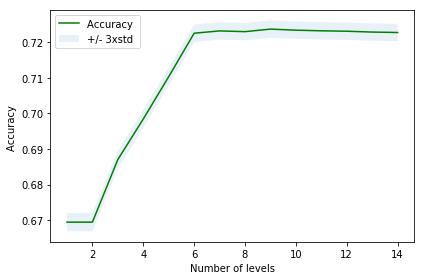

In [50]:
#Plot the accuracy of the models
plt.plot(range(1,depth),mean_acc,'g')
plt.fill_between(range(1,depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of levels')
plt.tight_layout()
plt.show()

In [51]:
#Build a model with max_depth 6
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 2 1 1 1]
162708    1
134034    2
173878    2
155376    1
100223    1
Name: SEVERITYCODE, dtype: int64


In [52]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7225860221454935


### Build the tree

In [54]:
import sys
!{sys.executable} -m pip install pydotplus

In [55]:
import sys
!{sys.executable} -m pip install graphviz

In [56]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [57]:
#String error when making the diagram -> convert to string
df.columns = df.columns.astype(str)
df = df.astype(str)
X_train = X_train.astype(str)
X_test = X_test.astype(str)
X = X.astype(str)
y = y.astype(str)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [68]:
#Build model again with string objects
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['1' '2' '1' '1' '1']
162708    1
134034    2
173878    2
155376    1
100223    1
Name: SEVERITYCODE, dtype: object


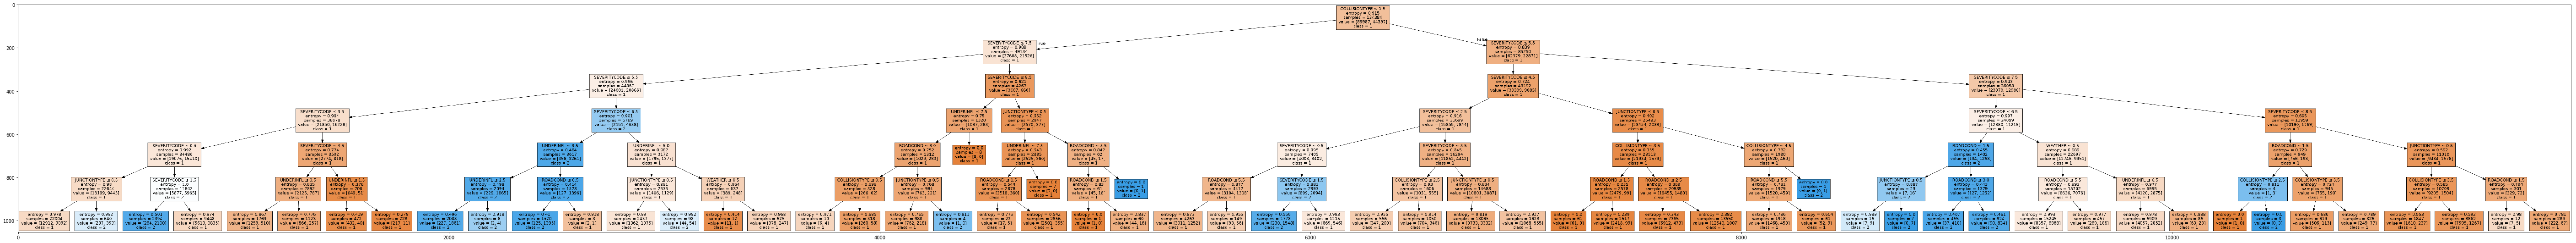

In [60]:
#Make the tree
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:6]
targetNames = df['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')